In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
users = pd.read_csv(r'takehome_users.csv', encoding='iso-8859-1')

In [127]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810.00%,1,0,11,10803.00%
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.00%,0,0,1,316.00%
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892.00%,0,0,94,1525.00%
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168.00%,0,0,1,5151.00%
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660.00%,0,0,193,5240.00%


In [128]:
users.rename(columns={'object_id':'user_id'}, inplace=True)

In [129]:
users.drop(columns=['name', 'email'], inplace=True)

In [130]:
engage = pd.read_csv('takehome_user_engagement.csv')

In [131]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [132]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [133]:
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])

In [134]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [135]:
engage.set_index('time_stamp', drop=True, inplace=True)
engage.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [136]:
engageq = engage.reset_index()

In [137]:
engage['user_id'].nunique()

8823

In [138]:
engage.sort_values(axis=0, by='time_stamp', inplace=True)

In [139]:
engage['three'] = engage.groupby('user_id')['visited'].transform(lambda s: s.rolling('7D').count())

In [140]:
adopted_users = engage[engage['three']>=3]['user_id'].unique()

In [141]:
users['user_id'].nunique()

12000

In [142]:
users['adopted'] = users['user_id'].apply(lambda x: x in adopted_users)

In [143]:
users.head(21)

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,1398138810.00%,1,0,11,10803.00%,False
1,2,2013-11-15 03:45:04,ORG_INVITE,1396237504.00%,0,0,1,316.00%,True
2,3,2013-03-19 23:14:52,ORG_INVITE,1363734892.00%,0,0,94,1525.00%,False
3,4,2013-05-21 08:09:28,GUEST_INVITE,1369210168.00%,0,0,1,5151.00%,False
4,5,2013-01-17 10:14:20,GUEST_INVITE,1358849660.00%,0,0,193,5240.00%,False
5,6,2013-12-17 03:37:06,GUEST_INVITE,1387424226.00%,0,0,197,11241.00%,False
6,7,2012-12-16 13:24:32,SIGNUP,1356009872.00%,0,1,37,nan%,False
7,8,2013-07-31 05:34:02,PERSONAL_PROJECTS,nan%,1,1,74,nan%,False
8,9,2013-11-05 04:04:24,PERSONAL_PROJECTS,nan%,0,0,302,nan%,False
9,10,2013-01-16 22:08:03,ORG_INVITE,1401833283.00%,1,1,318,4143.00%,True


In [144]:
adopted_users.sort()
adopted_users

array([    2,    10,    20, ..., 11969, 11975, 11988], dtype=int64)

In [145]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   creation_source             12000 non-null  object 
 3   last_session_creation_time  8823 non-null   float64
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   invited_by_user_id          6417 non-null   float64
 8   adopted                     12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 761.8+ KB


In [146]:
users.fillna(0, inplace=True)

In [147]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   creation_source             12000 non-null  object 
 3   last_session_creation_time  12000 non-null  float64
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   invited_by_user_id          12000 non-null  float64
 8   adopted                     12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 761.8+ KB


In [148]:
users

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,1398138810.00%,1,0,11,10803.00%,False
1,2,2013-11-15 03:45:04,ORG_INVITE,1396237504.00%,0,0,1,316.00%,True
2,3,2013-03-19 23:14:52,ORG_INVITE,1363734892.00%,0,0,94,1525.00%,False
3,4,2013-05-21 08:09:28,GUEST_INVITE,1369210168.00%,0,0,1,5151.00%,False
4,5,2013-01-17 10:14:20,GUEST_INVITE,1358849660.00%,0,0,193,5240.00%,False
...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,ORG_INVITE,1378448055.00%,0,0,89,8263.00%,False
11996,11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,1358274517.00%,0,0,200,0.00%,False
11997,11998,2014-04-27 12:45:16,GUEST_INVITE,1398602716.00%,1,1,83,8074.00%,False
11998,11999,2012-05-31 11:55:59,PERSONAL_PROJECTS,1338638159.00%,0,0,6,0.00%,False


In [149]:
users.rename(columns={'opted_in_to_mailing_list':'mail', 'enabled_for_marketing_drip':'marketing'}, inplace=True)

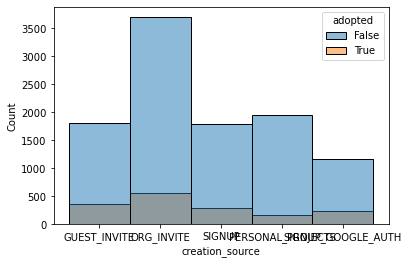

In [150]:
#cols = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted']
sns.histplot(data=users, x='creation_source', hue='adopted')
plt.show()

In [151]:
c_source = users.groupby(['adopted','creation_source']).count()['user_id'].unstack()
c_source_per = c_source/c_source.sum()*100
pd.options.display.float_format = '{:.2f}%'.format
c_source_per

creation_source,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
adopted,,,,,
False,83.36%,87.00%,92.23%,85.96%,83.25%
True,16.64%,13.00%,7.77%,14.04%,16.75%


In [152]:
c_a = users.groupby(['adopted']).count()['user_id']
c_a_per = c_a/c_a.sum()*100
pd.options.display.float_format = '{:.2f}%'.format
c_a_per

adopted
False   86.65%
True    13.35%
Name: user_id, dtype: float64

In [153]:
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [154]:
earliest = users['creation_time'].min()
earliest

Timestamp('2012-05-31 00:43:27')

In [155]:
users['duration'] = users['creation_time'] - users['creation_time'].min()
users['duration'] = users['duration'].dt.days
users['duration']

0        691
1        533
2        292
3        355
4        231
        ... 
11995    463
11996    224
11997    696
11998      0
11999    605
Name: duration, Length: 12000, dtype: int64

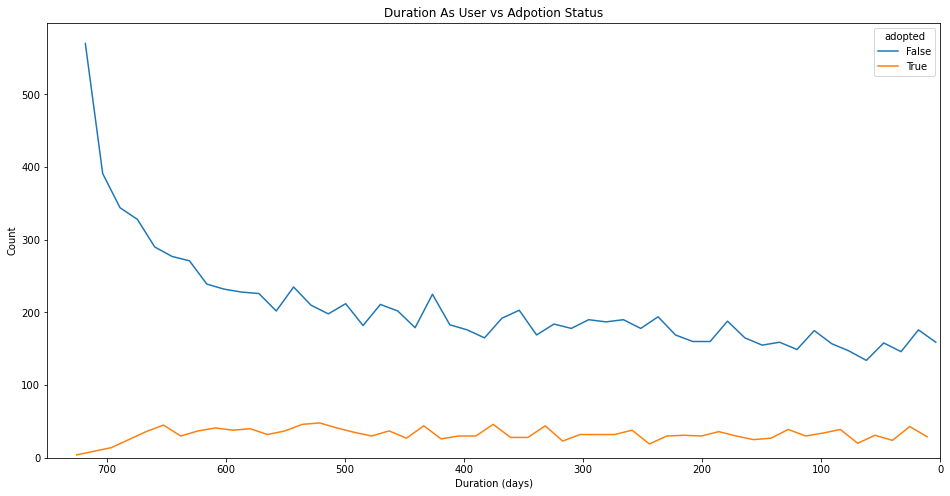

In [156]:
plt.figure(figsize=(16,8))
sns.histplot(data=users, x='duration', hue='adopted', multiple='dodge', bins=50, element='poly', fill=False)
plt.xlim((750,0))
plt.title('Duration As User vs Adpotion Status')
plt.xlabel('Duration (days)')
plt.show()

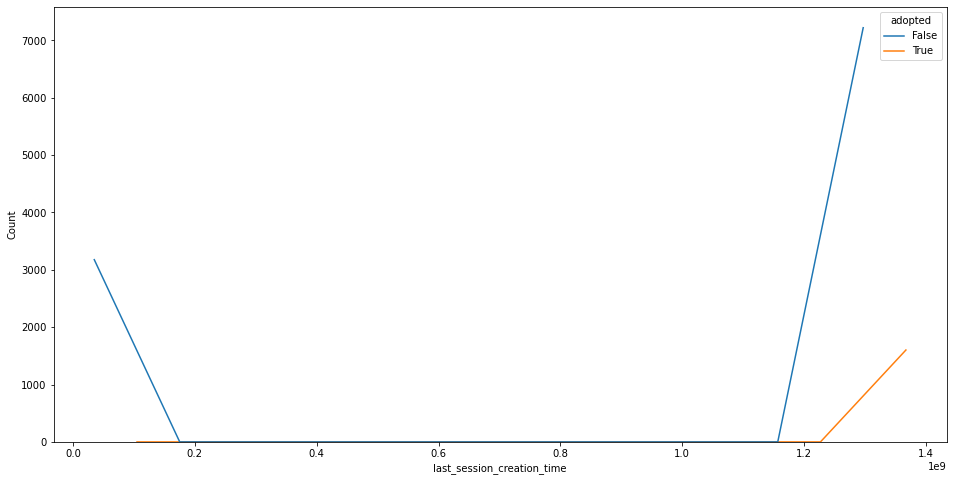

In [230]:
plt.figure(figsize=(16,8))
sns.histplot(data=users, x='last_session_creation_time', hue='adopted', multiple='dodge', bins=10, element='poly', fill=False)

plt.show()

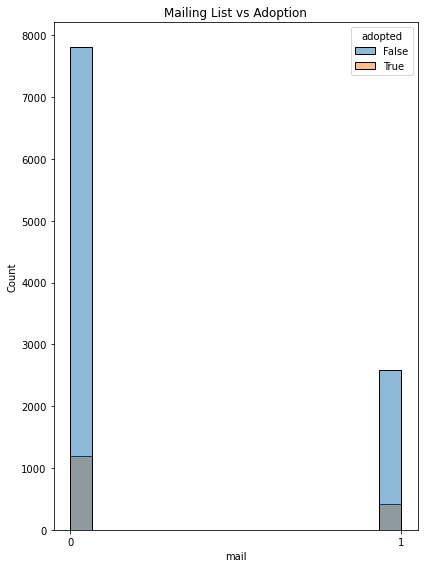

In [157]:
plt.figure(figsize=(6,8))
sns.histplot(data=users, x='mail', hue='adopted')
plt.title('Mailing List vs Adoption')
plt.xticks([0,1])
plt.tight_layout()
plt.show()

In [158]:
c_source = users.groupby(['adopted','mail']).count()[['user_id']].unstack()
c_source_per = c_source/c_source.sum()*100
pd.options.display.float_format = '{:.2f}%'.format
c_source_per

user_id       
mail          0      1
adopted               
False    86.81% 86.17%
True     13.19% 13.83%

In [159]:
c_source = users.groupby(['adopted','marketing']).count()[['user_id']].unstack()
c_source_per = c_source/c_source.sum()*100
pd.options.display.float_format = '{:.2f}%'.format
c_source_per

user_id       
marketing       0      1
adopted                 
False      86.72% 86.27%
True       13.28% 13.73%

In [160]:
#users.loc[users['org_id']!=0, 'org_id'] = 1

In [187]:
c_source = users.groupby(['adopted','org_id']).count()[['user_id']].unstack()
c_source_per = c_source/c_source.sum(axis=0)*100
pd.options.display.float_format = '{:.2f}%'.format
c_source_per.T.sort_values(True)

adopted          False  True 
        org_id               
user_id 51      97.37%  2.63%
        86      97.14%  2.86%
        0       96.55%  3.45%
        26      96.23%  3.77%
        204     96.00%  4.00%
...                ...    ...
        365    100.00%   nan%
        394    100.00%   nan%
        396    100.00%   nan%
        412    100.00%   nan%
        416    100.00%   nan%

[417 rows x 2 columns]

In [206]:
counts = users['org_id'].value_counts()
c = counts[counts > 50].index
f = users.loc[users['org_id'].isin(c), ['org_id','adopted','user_id']].groupby(['org_id','adopted'])['user_id'].count()


In [217]:
f2=f.unstack().T
f2
f3=f2/f2.sum()*100
f3.T.sort_values(by=True, ascending=False)

adopted,False,True
org_id,,
13,80.56%,19.44%
31,83.33%,16.67%
24,84.13%,15.87%
33,84.21%,15.79%
7,86.55%,13.45%
20,86.76%,13.24%
19,86.79%,13.21%
25,87.10%,12.90%
15,87.50%,12.50%


In [221]:
users.loc[users['invited_by_user_id']!=0, 'invited_by_user_id'] = 1
users['invited_by_user_id']=users['invited_by_user_id'].astype('int')

In [222]:
c_source = users.groupby(['adopted','invited_by_user_id']).count()[['user_id']].unstack()
c_source_per = c_source/c_source.sum(axis=0)*100
pd.options.display.float_format = '{:.2f}%'.format
c_source_per

user_id       
invited_by_user_id       0      1
adopted                          
False               87.66% 85.77%
True                12.34% 14.23%

In [38]:
users.shape[0]

12000

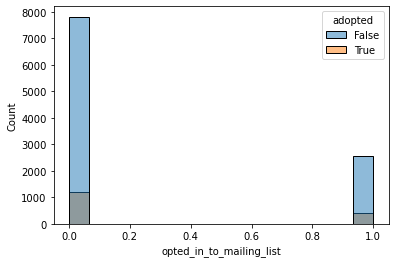

In [31]:
sns.histplot(data=users, x='opted_in_to_mailing_list', hue='adopted')
plt.show()

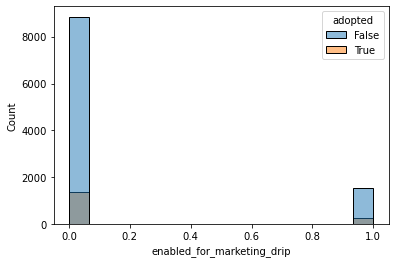

In [33]:
sns.histplot(data=users, x='enabled_for_marketing_drip', hue='adopted')
plt.show()

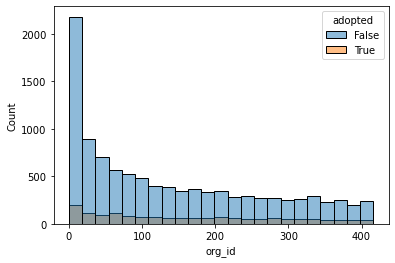

In [37]:
sns.histplot(data=users, x='org_id', hue='adopted')
plt.show()

In [ ]:
sns.histplot(data=users, x='org_id', hue='adopted')
plt.show()